# Quick note

The final dataset contains 76 columns, while the dataset transformed using dummy variables consists of 258 columns. I didn't want the user to input values for all 258 columns, as I believe this would not only be impractical but also significantly increase the chances of errors. Therefore, I created a *.py* file called `converter.py` with function called *dummies_converter* that transforms the user's input into dummy variables and reshapes it into an appropriate format. Specifically, it converts the user's input of 76 values into an output containing 257 values (one value is missing because the *'SalePrice'* column was excluded to ensure the function's result is immediately ready for price predictions).

The project is organized into sections: default, cross-validation, scaled default, scaled cross-validation and mean error. The goal of this structure is to improve the organization of the project and to facilitate comparisons between all types of models.

**The project follows the following format:** 

* The cell in which the operation was performed

* The result of that operation

* A textual explanation detailing what was done in the cell, the conclusion, the idea, and similar information.

# Importing libraries

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
pwd

'C:\\Users\\jovan\\Desktop\\HouseProject\\House_Price_Prediction_-_Classification'

# Importing data

In [3]:
df = pd.read_csv('C:\\Users\\jovan\\Desktop\\HouseProject\\House_Price_Prediction_-_Classification\\Data\\Housing_Data_Final.csv')
df = df.drop('Unnamed: 0', axis = 1)

In [3]:
df

PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0     526301100           20    141.000000     31770             6   
1     526350040           20     80.000000     11622             5   
2     526351010           20     81.000000     14267             6   
3     526353030           20     93.000000     11160             7   
4     527105010           60     74.000000     13830             5   
...         ...          ...           ...       ...           ...   
2921  923275080           80     37.000000      7937             6   
2922  923276100           20     75.144444      8885             5   
2923  923400125           85     62.000000     10441             5   
2924  924100070           20     77.000000     10010             5   
2925  924151050           60     74.000000      9627             7   

      Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  \
0                5        1960            1960         112.0         639.0   
1                6        1961            1961           0.0         468.0   
2                6        1958            1958         108.0         923.0   
3                5        1968            1968           0.0        1065.0   
4                5        1997            1998           0.0         791.0   
...            ...         ...             ...           ...           ...   
2921             6        1984            1984           0.0         819.0   
2922             5        1983            1983           0.0         301.0   
2923             5        1992            1992           0.0         337.0   
2924             5        1974            1975           0.0        1071.0   
2925             5        1993            1994          94.0         758.0   

      ...  Sale Type_ConLw  Sale Type_New  Sale Type_Oth  Sale Type_VWD  \
0     ...                0              0              0              0   
1     ...                0              0              0              0   
2     ...                0              0              0              0   
3     ...                0              0              0              0   
4     ...                0              0              0              0   
...   ...              ...            ...            ...            ...   
2921  ...                0              0              0              0   
2922  ...                0              0              0              0   
2923  ...                0              0              0              0   
2924  ...                0              0              0              0   
2925  ...                0              0              0              0   

      Sale Type_WD   Sale Condition_AdjLand  Sale Condition_Alloca  \
0                 1                       0                      0   
1                 1                       0                      0   
2                 1                       0                      0   
3                 1                       0                      0   
4                 1                       0                      0   
...             ...                     ...                    ...   
2921              1                       0                      0   
2922              1                       0                      0   
2923              1                       0                      0   
2924              1                       0                      0   
2925              1                       0                      0   

      Sale Condition_Family  Sale Condition_Normal  Sale Condition_Partial  
0                         0                      1                       0  
1                         0                      1                       0  
2                         0                      1                       0  
3                         0                      1                       0  
4                         0                      1                       0  
...                     ...   

# Train_test split

In [4]:
X = df.drop('MS SubClass', axis = 1)

In [5]:
y = df['MS SubClass']

#####  `y` will be *'SalePrice'*

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Functions

In [443]:
accuracy_dict = {}
precision_dict = {}
recall_dict = {}
f1_score_dict = {}

In [210]:
def accuracy_function(model, preds):
    print(classification_report(y_test, preds, zero_division = 0))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

**This function displays confusion matrix and print classification report.**

-----

In [9]:
def accuracy_function_scaled(model, preds):
    print(classification_report(y_test, preds, zero_division = 0))
    ConfusionMatrixDisplay.from_estimator(model, scaled_X_test, y_test)

**This function displays confusion matrix and print classification report for scaled values for X_train and X_test.**

-----

In [283]:
def function_model(model, model_name):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy_dict[model_name] = np.round(accuracy_score(y_test, preds), 2)
    precision_dict[model_name] = np.round(precision_score(y_test, preds, average = 'macro', zero_division = 0), 2)
    recall_dict[model_name] = np.round(recall_score(y_test, preds, average = 'macro', zero_division = 0), 2)
    f1_score_dict[model_name] = np.round(f1_score(y_test, preds, average = 'macro', zero_division = 0), 2)
    accuracy_function(model, preds)

**This function fits the model, pulls the predictions from it and calls accuracy_function.**

-----

In [284]:
def function_model_scaled(model, model_name):
    model.fit(scaled_X_train, y_train)
    preds = model.predict(scaled_X_test)
    accuracy_dict[model_name] = np.round(accuracy_score(y_test, preds), 2)
    precision_dict[model_name] = np.round(precision_score(y_test, preds, average = 'macro', zero_division = 0), 2)
    recall_dict[model_name] = np.round(recall_score(y_test, preds, average = 'macro', zero_division = 0), 2)
    f1_score_dict[model_name] = np.round(f1_score(y_test, preds, average = 'macro', zero_division = 0), 2)
    accuracy_function_scaled(model, preds)

**This function fits the model, pulls the predictions from it and calls accuracy_function_scaled for scaled values for X_train and X_test.**

-----

# Default models

**LOGISTIC REGRESSION**

In [445]:
from sklearn.linear_model import LogisticRegression

In [446]:
logistic_model = LogisticRegression(max_iter = 1000)

              precision    recall  f1-score   support

          20       0.37      0.79      0.50       266
          30       0.00      0.00      0.00        32
          40       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         4
          50       0.22      0.16      0.19        81
          60       0.45      0.30      0.36       161
          70       0.00      0.00      0.00        28
          75       0.00      0.00      0.00         5
          80       0.00      0.00      0.00        27
          85       0.00      0.00      0.00         8
          90       0.00      0.00      0.00        25
         120       0.00      0.00      0.00        38
         150       0.00      0.00      0.00         1
         160       0.00      0.00      0.00        36
         180       0.00      0.00      0.00         4
         190       0.00      0.00      0.00        15

    accuracy                           0.37       732
   macro avg       0.07   

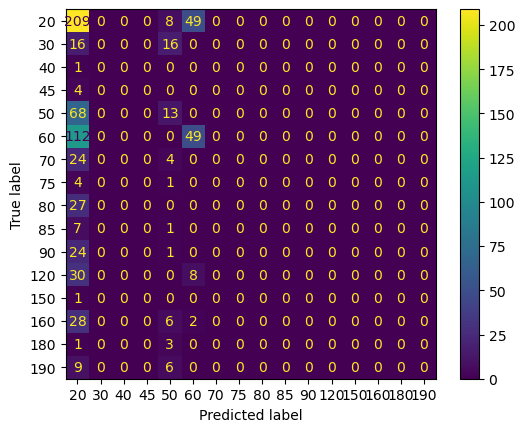

In [447]:
function_model(logistic_model, 'logistic_model_default')

**SUPPORT VECTOR MACHINES**

In [448]:
from sklearn.svm import SVC

In [449]:
svc_model = SVC()

              precision    recall  f1-score   support

          20       0.36      1.00      0.53       266
          30       0.00      0.00      0.00        32
          40       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         4
          50       0.00      0.00      0.00        81
          60       0.00      0.00      0.00       161
          70       0.00      0.00      0.00        28
          75       0.00      0.00      0.00         5
          80       0.00      0.00      0.00        27
          85       0.00      0.00      0.00         8
          90       0.00      0.00      0.00        25
         120       0.00      0.00      0.00        38
         150       0.00      0.00      0.00         1
         160       0.00      0.00      0.00        36
         180       0.00      0.00      0.00         4
         190       0.00      0.00      0.00        15

    accuracy                           0.36       732
   macro avg       0.02   

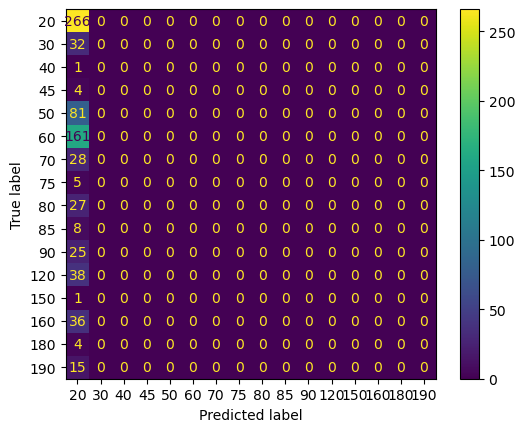

In [450]:
function_model(svc_model, 'svc_model_default')

**KNEAREST NEIGHBORS**

In [451]:
from sklearn.neighbors import KNeighborsClassifier

In [452]:
knn_model = KNeighborsClassifier()

              precision    recall  f1-score   support

          20       0.57      0.71      0.64       266
          30       0.36      0.47      0.41        32
          40       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         4
          50       0.46      0.38      0.42        81
          60       0.62      0.58      0.60       161
          70       0.47      0.32      0.38        28
          75       0.00      0.00      0.00         5
          80       0.25      0.11      0.15        27
          85       0.00      0.00      0.00         8
          90       0.44      0.16      0.24        25
         120       0.53      0.71      0.61        38
         150       0.00      0.00      0.00         1
         160       0.79      0.75      0.77        36
         180       0.20      0.25      0.22         4
         190       0.00      0.00      0.00        15

    accuracy                           0.55       732
   macro avg       0.29   

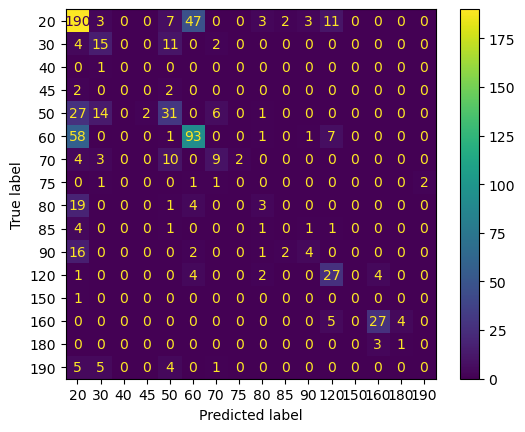

In [453]:
function_model(knn_model, 'knn_model_default')

**DECISION TREES**

In [454]:
from sklearn.tree import DecisionTreeClassifier

In [455]:
decision_tree_model = DecisionTreeClassifier()

              precision    recall  f1-score   support

          20       1.00      1.00      1.00       266
          30       0.94      0.94      0.94        32
          40       0.00      0.00      0.00         1
          45       1.00      0.75      0.86         4
          50       0.92      0.99      0.95        81
          60       0.99      0.98      0.98       161
          70       0.96      0.86      0.91        28
          75       1.00      0.60      0.75         5
          80       0.96      1.00      0.98        27
          85       1.00      0.88      0.93         8
          90       0.96      1.00      0.98        25
         120       0.95      1.00      0.97        38
         150       0.00      0.00      0.00         1
         160       0.92      0.97      0.95        36
         180       0.80      1.00      0.89         4
         190       1.00      0.93      0.97        15

    accuracy                           0.97       732
   macro avg       0.84   

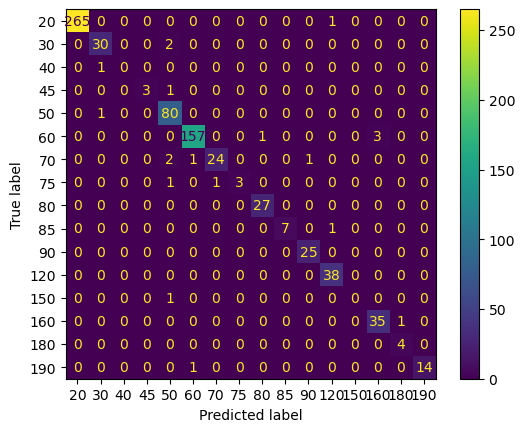

In [456]:
function_model(decision_tree_model, 'decision_tree_model_default')

**RANDOM FORESTS**

In [457]:
from sklearn.ensemble import RandomForestClassifier

In [458]:
random_forests_model = RandomForestClassifier()

              precision    recall  f1-score   support

          20       0.98      0.99      0.99       266
          30       0.91      0.91      0.91        32
          40       0.00      0.00      0.00         1
          45       1.00      0.25      0.40         4
          50       0.80      0.95      0.87        81
          60       0.99      0.99      0.99       161
          70       0.82      0.82      0.82        28
          75       0.00      0.00      0.00         5
          80       0.96      1.00      0.98        27
          85       0.88      0.88      0.88         8
          90       1.00      0.96      0.98        25
         120       0.97      1.00      0.99        38
         150       0.00      0.00      0.00         1
         160       1.00      1.00      1.00        36
         180       1.00      1.00      1.00         4
         190       1.00      0.40      0.57        15

    accuracy                           0.95       732
   macro avg       0.77   

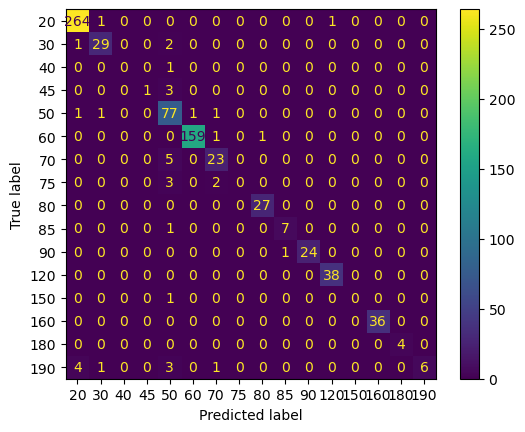

In [459]:
function_model(random_forests_model, 'random_forests_model_default')

**GRADIENT BOOSTING**

In [460]:
from sklearn.ensemble import GradientBoostingClassifier

In [461]:
gradient_boosting_model = GradientBoostingClassifier()

              precision    recall  f1-score   support

          20       1.00      1.00      1.00       266
          30       0.97      0.94      0.95        32
          40       0.00      0.00      0.00         1
          45       0.60      0.75      0.67         4
          50       0.93      0.99      0.96        81
          60       0.99      0.99      0.99       161
          70       0.93      0.96      0.95        28
          75       1.00      0.40      0.57         5
          80       0.93      1.00      0.96        27
          85       1.00      0.88      0.93         8
          90       1.00      1.00      1.00        25
         120       1.00      1.00      1.00        38
         150       0.00      0.00      0.00         1
         160       1.00      0.97      0.99        36
         180       0.75      0.75      0.75         4
         190       1.00      0.93      0.97        15

    accuracy                           0.98       732
   macro avg       0.82   

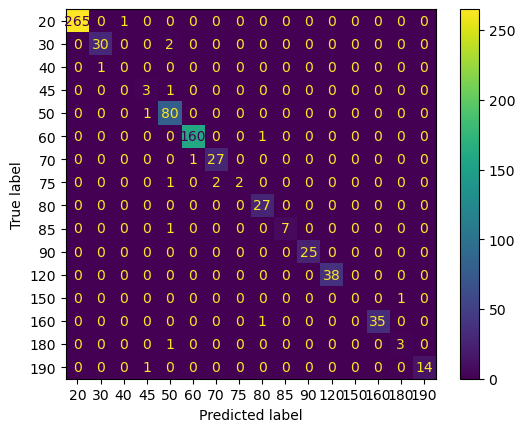

In [462]:
function_model(gradient_boosting_model, 'gradient_boosting_model_default')

**ADA BOOST**

In [463]:
from sklearn.ensemble import AdaBoostClassifier

In [464]:
ada_boost_model = AdaBoostClassifier()

              precision    recall  f1-score   support

          20       0.79      1.00      0.89       266
          30       0.00      0.00      0.00        32
          40       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         4
          50       0.00      0.00      0.00        81
          60       0.44      1.00      0.61       161
          70       0.00      0.00      0.00        28
          75       0.00      0.00      0.00         5
          80       0.00      0.00      0.00        27
          85       0.00      0.00      0.00         8
          90       1.00      1.00      1.00        25
         120       0.00      0.00      0.00        38
         150       0.00      0.00      0.00         1
         160       0.00      0.00      0.00        36
         180       0.00      0.00      0.00         4
         190       1.00      0.27      0.42        15

    accuracy                           0.62       732
   macro avg       0.20   

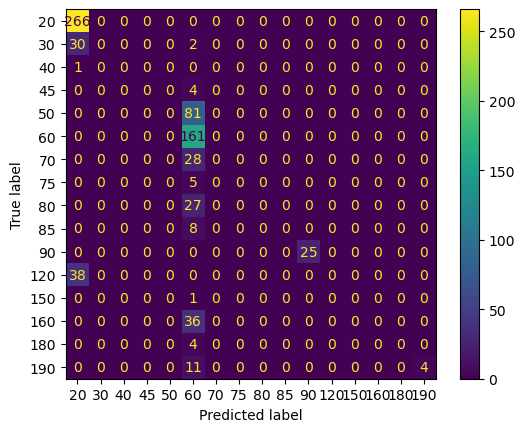

In [465]:
function_model(ada_boost_model, 'ada_boost_model_default')

# Scaled default models

In [467]:
from sklearn.preprocessing import StandardScaler

In [468]:
scaler = StandardScaler()

In [469]:
scaled_X_train = scaler.fit_transform(X_train)

In [470]:
scaled_X_test = scaler.transform(X_test)

**LOGISTIC REGRESSION**

In [471]:
logistic_model_scaled = LogisticRegression(max_iter = 1000)

              precision    recall  f1-score   support

          20       0.98      0.98      0.98       266
          30       0.79      0.84      0.82        32
          40       0.00      0.00      0.00         1
          45       1.00      0.75      0.86         4
          50       0.90      0.96      0.93        81
          60       0.99      0.96      0.98       161
          70       0.74      0.82      0.78        28
          75       0.67      0.40      0.50         5
          80       0.96      1.00      0.98        27
          85       1.00      0.88      0.93         8
          90       1.00      1.00      1.00        25
         120       1.00      1.00      1.00        38
         150       0.00      0.00      0.00         1
         160       1.00      1.00      1.00        36
         180       1.00      1.00      1.00         4
         190       1.00      1.00      1.00        15

    accuracy                           0.96       732
   macro avg       0.82   

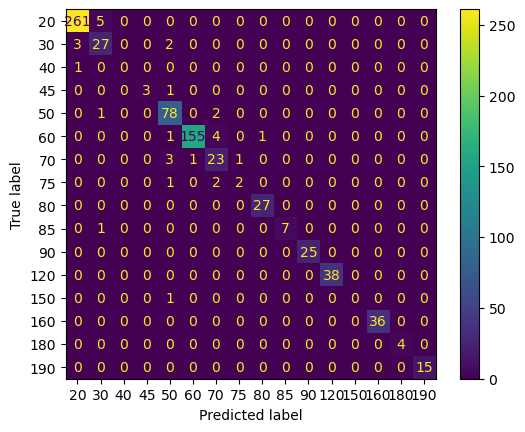

In [472]:
function_model_scaled(logistic_model_scaled, 'logistic_model_scaled')

**SUPPORT VECTOR MACHINES**

In [473]:
svc_model_scaled = SVC()

              precision    recall  f1-score   support

          20       0.84      0.99      0.91       266
          30       0.76      0.59      0.67        32
          40       0.00      0.00      0.00         1
          45       1.00      0.75      0.86         4
          50       0.77      0.83      0.80        81
          60       0.99      0.94      0.96       161
          70       0.82      0.50      0.62        28
          75       1.00      0.20      0.33         5
          80       0.96      0.89      0.92        27
          85       1.00      0.62      0.77         8
          90       1.00      0.80      0.89        25
         120       1.00      0.95      0.97        38
         150       0.00      0.00      0.00         1
         160       1.00      0.94      0.97        36
         180       1.00      1.00      1.00         4
         190       1.00      0.60      0.75        15

    accuracy                           0.89       732
   macro avg       0.82   

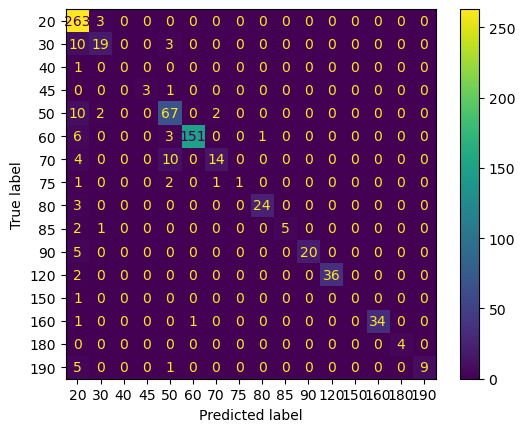

In [474]:
function_model_scaled(svc_model_scaled, 'svc_model_scaled')

**KNEAREST NEIGHBORS**

In [475]:
knn_model_scaled = KNeighborsClassifier()

              precision    recall  f1-score   support

          20       0.74      0.92      0.82       266
          30       0.33      0.47      0.39        32
          40       0.00      0.00      0.00         1
          45       0.75      0.75      0.75         4
          50       0.56      0.47      0.51        81
          60       0.86      0.85      0.85       161
          70       0.46      0.21      0.29        28
          75       1.00      0.20      0.33         5
          80       0.80      0.44      0.57        27
          85       0.60      0.38      0.46         8
          90       1.00      0.64      0.78        25
         120       0.94      0.87      0.90        38
         150       0.00      0.00      0.00         1
         160       0.92      0.92      0.92        36
         180       1.00      0.75      0.86         4
         190       0.67      0.13      0.22        15

    accuracy                           0.75       732
   macro avg       0.66   

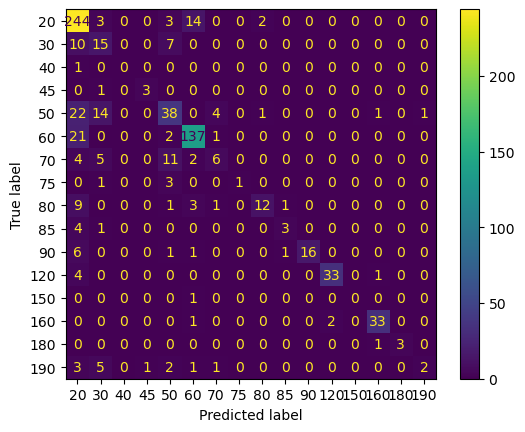

In [476]:
function_model_scaled(knn_model_scaled, 'knn_model_scaled')

**DECISION TREES**

In [477]:
decision_tree_model_scaled = DecisionTreeClassifier()

              precision    recall  f1-score   support

          20       1.00      0.99      0.99       266
          30       0.94      0.91      0.92        32
          40       0.00      0.00      0.00         1
          45       0.67      0.50      0.57         4
          50       0.92      0.98      0.95        81
          60       0.99      0.99      0.99       161
          70       0.92      0.86      0.89        28
          75       1.00      0.60      0.75         5
          80       0.96      1.00      0.98        27
          85       1.00      0.88      0.93         8
          90       0.96      1.00      0.98        25
         120       0.95      1.00      0.97        38
         150       0.00      0.00      0.00         1
         160       1.00      0.97      0.99        36
         180       0.80      1.00      0.89         4
         190       0.93      0.87      0.90        15

    accuracy                           0.97       732
   macro avg       0.81   

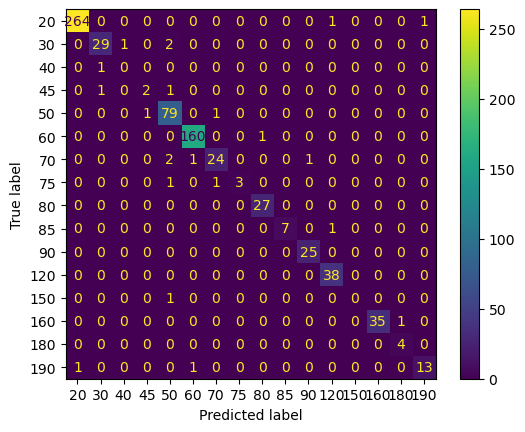

In [478]:
function_model_scaled(decision_tree_model_scaled, 'decision_tree_model_scaled')

**RANDOM FORESTS**

In [479]:
random_forests_model_scaled = RandomForestClassifier()

              precision    recall  f1-score   support

          20       0.97      1.00      0.99       266
          30       0.88      0.88      0.88        32
          40       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         4
          50       0.81      0.96      0.88        81
          60       0.99      0.99      0.99       161
          70       0.81      0.79      0.80        28
          75       0.00      0.00      0.00         5
          80       0.96      1.00      0.98        27
          85       1.00      0.88      0.93         8
          90       1.00      1.00      1.00        25
         120       1.00      1.00      1.00        38
         150       0.00      0.00      0.00         1
         160       0.97      1.00      0.99        36
         180       1.00      1.00      1.00         4
         190       1.00      0.20      0.33        15

    accuracy                           0.95       732
   macro avg       0.71   

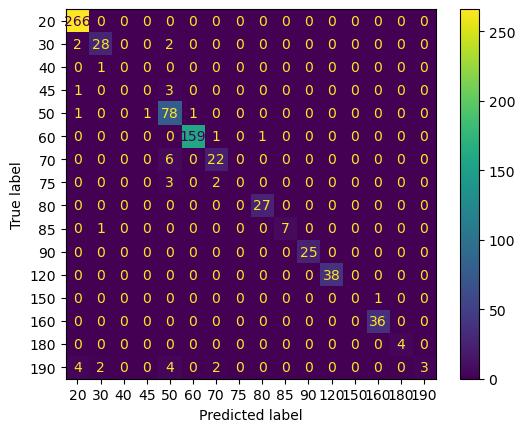

In [480]:
function_model_scaled(random_forests_model_scaled, 'random_forests_model_scaled')

**GRADIENT BOOSTING**

In [481]:
gradient_boosting_model_scaled = GradientBoostingClassifier()

              precision    recall  f1-score   support

          20       1.00      1.00      1.00       266
          30       0.97      0.94      0.95        32
          40       0.00      0.00      0.00         1
          45       0.60      0.75      0.67         4
          50       0.93      0.99      0.96        81
          60       0.99      0.99      0.99       161
          70       0.93      0.96      0.95        28
          75       1.00      0.40      0.57         5
          80       0.93      1.00      0.96        27
          85       1.00      0.88      0.93         8
          90       1.00      1.00      1.00        25
         120       0.97      1.00      0.99        38
         150       0.00      0.00      0.00         1
         160       1.00      0.97      0.99        36
         180       1.00      0.75      0.86         4
         190       1.00      0.93      0.97        15

    accuracy                           0.98       732
   macro avg       0.83   

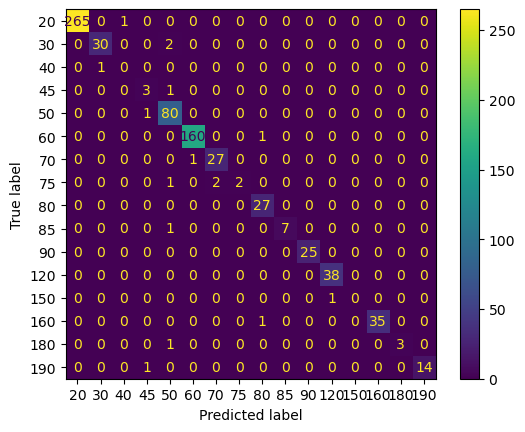

In [482]:
function_model_scaled(gradient_boosting_model_scaled, 'gradient_boosting_model_scaled')

**ADA BOOST**

In [483]:
ada_boost_model_scaled = AdaBoostClassifier()

              precision    recall  f1-score   support

          20       0.79      1.00      0.89       266
          30       0.00      0.00      0.00        32
          40       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         4
          50       0.00      0.00      0.00        81
          60       0.44      1.00      0.61       161
          70       0.00      0.00      0.00        28
          75       0.00      0.00      0.00         5
          80       0.00      0.00      0.00        27
          85       0.00      0.00      0.00         8
          90       1.00      1.00      1.00        25
         120       0.00      0.00      0.00        38
         150       0.00      0.00      0.00         1
         160       0.00      0.00      0.00        36
         180       0.00      0.00      0.00         4
         190       1.00      0.27      0.42        15

    accuracy                           0.62       732
   macro avg       0.20   

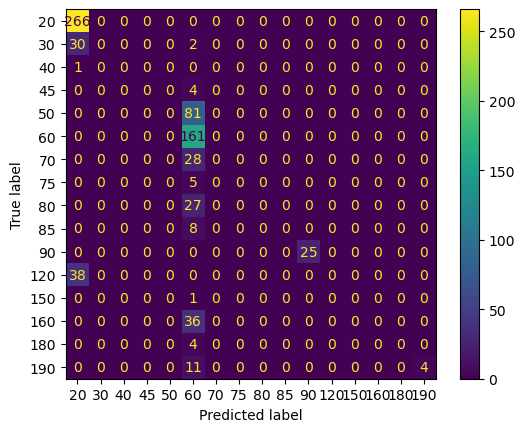

In [484]:
function_model_scaled(ada_boost_model_scaled, 'ada_boost_model_scaled')

# Cross-Validation

In [486]:
from sklearn.model_selection import GridSearchCV

-----

**LOGISTIC REGRESSION**

***penalty: l1***

In [487]:
log_model_l1_cv = LogisticRegression(max_iter = 1000, penalty = 'l1', solver = 'liblinear')

In [488]:
C = np.linspace(0.1, 1, 10)
l1_ratio = np.linspace(0, 1, 10)

In [489]:
param_grid_l1 = {'C' : C}

In [490]:
logistic_model_l1_cv = GridSearchCV(estimator = log_model_l1_cv, param_grid = param_grid_l1)

              precision    recall  f1-score   support

          20       0.99      0.99      0.99       266
          30       0.88      0.88      0.88        32
          40       0.00      0.00      0.00         1
          45       0.75      0.75      0.75         4
          50       0.95      0.99      0.97        81
          60       0.99      0.99      0.99       161
          70       0.89      0.89      0.89        28
          75       0.75      0.60      0.67         5
          80       0.93      1.00      0.96        27
          85       1.00      1.00      1.00         8
          90       1.00      1.00      1.00        25
         120       1.00      0.97      0.99        38
         150       0.00      0.00      0.00         1
         160       1.00      0.97      0.99        36
         180       1.00      1.00      1.00         4
         190       1.00      1.00      1.00        15

    accuracy                           0.97       732
   macro avg       0.82   

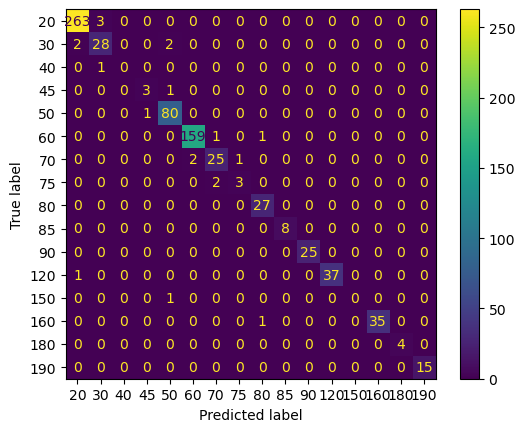

In [491]:
function_model_scaled(logistic_model_l1_cv, 'logistic_model_l1_cv')

***penalty: l2***

In [492]:
log_model_l2_cv = LogisticRegression(max_iter = 1000, penalty = 'l2')

In [493]:
param_grid_l2 = {'C' : C}

In [494]:
logistic_model_l2_cv = GridSearchCV(estimator = log_model_l2_cv, param_grid = param_grid_l2)

              precision    recall  f1-score   support

          20       0.98      0.98      0.98       266
          30       0.77      0.84      0.81        32
          40       0.00      0.00      0.00         1
          45       1.00      0.75      0.86         4
          50       0.91      0.98      0.94        81
          60       0.99      0.96      0.98       161
          70       0.77      0.82      0.79        28
          75       0.67      0.40      0.50         5
          80       0.96      1.00      0.98        27
          85       1.00      0.88      0.93         8
          90       1.00      1.00      1.00        25
         120       1.00      1.00      1.00        38
         150       0.00      0.00      0.00         1
         160       1.00      1.00      1.00        36
         180       1.00      1.00      1.00         4
         190       1.00      1.00      1.00        15

    accuracy                           0.96       732
   macro avg       0.82   

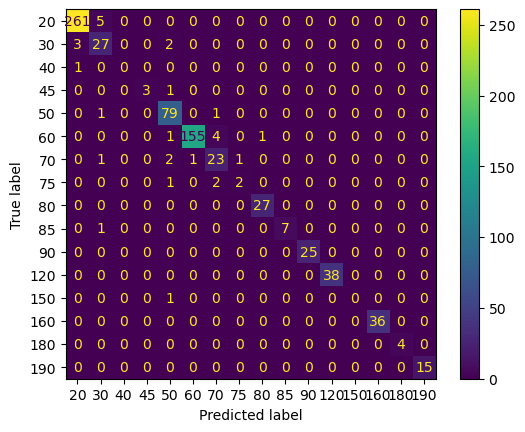

In [495]:
function_model_scaled(logistic_model_l2_cv, 'logistic_model_l2_cv')

In [496]:
logistic_model_l1_cv.best_params_

{'C': 0.6}

In [497]:
logistic_model_l2_cv.best_params_

{'C': 0.6}

**SUPPORT VECTOR MACHINES**

In [502]:
svm_cv = SVC()

In [503]:
C = [0.001, 0.01, 0.1, 0.5, 1] 
kernel = ['linear', 'rbf', 'poly']
gamma = ['scale', 'auto']
degree = [2, 3, 4]

In [504]:
param_grid = {'C' : C, 'kernel' : kernel, 'gamma' : gamma, 'degree' : degree}

In [505]:
svm_model_cv = GridSearchCV(estimator = svm_cv, param_grid = param_grid)

              precision    recall  f1-score   support

          20       0.98      0.98      0.98       266
          30       0.84      0.84      0.84        32
          40       0.00      0.00      0.00         1
          45       0.60      0.75      0.67         4
          50       0.92      0.99      0.95        81
          60       0.99      0.97      0.98       161
          70       0.86      0.86      0.86        28
          75       0.75      0.60      0.67         5
          80       0.96      1.00      0.98        27
          85       1.00      1.00      1.00         8
          90       1.00      1.00      1.00        25
         120       1.00      0.97      0.99        38
         150       0.00      0.00      0.00         1
         160       1.00      1.00      1.00        36
         180       1.00      1.00      1.00         4
         190       0.93      0.93      0.93        15

    accuracy                           0.96       732
   macro avg       0.80   

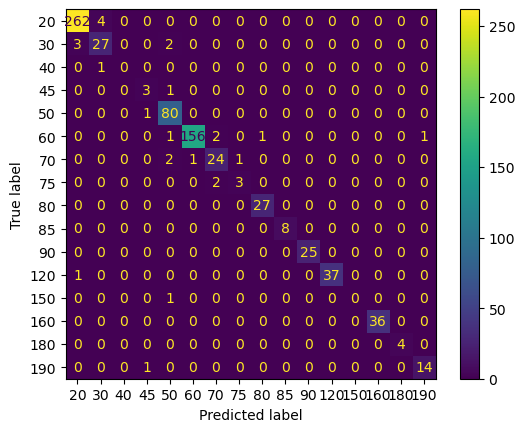

In [506]:
function_model_scaled(svm_model_cv, 'svm_model_cv')

**DECISION TREES**

In [561]:
decision_model_cv = DecisionTreeClassifier()

In [562]:
param_grid = {'splitter' : ['best', 'random'],
              'max_depth' : [None, 1, 2, 3, 4, 5],
              'criterion' : ['entropy', 'gini', 'log_loss']}

In [563]:
decision_trees_model_cv = GridSearchCV(estimator = decision_model_cv, param_grid = param_grid) 

              precision    recall  f1-score   support

          20       1.00      0.99      1.00       266
          30       0.97      0.91      0.94        32
          40       0.00      0.00      0.00         1
          45       0.75      0.75      0.75         4
          50       0.92      0.99      0.95        81
          60       0.99      0.99      0.99       161
          70       0.96      0.89      0.93        28
          75       1.00      0.60      0.75         5
          80       0.96      1.00      0.98        27
          85       1.00      0.88      0.93         8
          90       1.00      1.00      1.00        25
         120       0.97      1.00      0.99        38
         150       0.00      0.00      0.00         1
         160       1.00      0.97      0.99        36
         180       0.67      1.00      0.80         4
         190       0.94      1.00      0.97        15

    accuracy                           0.98       732
   macro avg       0.82   

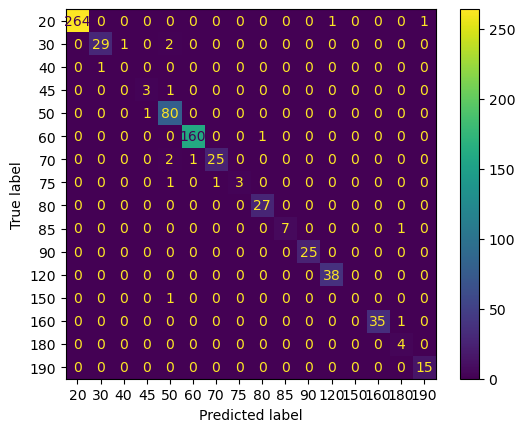

In [564]:
function_model_scaled(decision_trees_model_cv, 'decision_trees_model_cv')

**RANDOM FORESTS**

In [511]:
random_model_cv = RandomForestClassifier()

In [512]:
n_estimators = [64, 100, 128, 200]
max_features = [2, 3, 4]
bootstrap = [True, False]
oob_score = [True, False]

In [513]:
param_grid = {'n_estimators' : n_estimators, 'max_features' : max_features, 'bootstrap' : bootstrap, 'oob_score' : oob_score}

In [514]:
random_forests_model_cv = GridSearchCV(estimator = random_model_cv, param_grid = param_grid)

C:\Users\jovan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jovan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jovan\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\U

              precision    recall  f1-score   support

          20       0.91      0.99      0.95       266
          30       0.76      0.81      0.79        32
          40       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         4
          50       0.73      0.89      0.80        81
          60       0.98      0.98      0.98       161
          70       0.81      0.61      0.69        28
          75       0.00      0.00      0.00         5
          80       0.94      0.59      0.73        27
          85       1.00      0.50      0.67         8
          90       0.93      1.00      0.96        25
         120       0.97      1.00      0.99        38
         150       0.00      0.00      0.00         1
         160       1.00      0.94      0.97        36
         180       1.00      1.00      1.00         4
         190       1.00      0.20      0.33        15

    accuracy                           0.90       732
   macro avg       0.69   

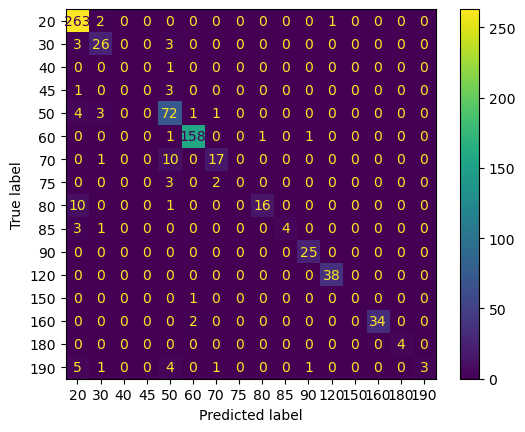

In [568]:
function_model_scaled(random_forests_model_cv, 'random_forests_model_cv')

In [516]:
random_forests_model_cv.best_params_

{'bootstrap': False,
 'max_features': 4,
 'n_estimators': 128,
 'oob_score': False}

**GRADIENT BOOSTING**

In [517]:
gradient_model_cv = GradientBoostingClassifier()

In [518]:
n_estimators =  [100, 200]
subsample = [0.3, 0.6]

In [519]:
param_grid = {'n_estimators' : n_estimators, 'subsample' : subsample}

In [520]:
gradient_boosting_model_cv = GridSearchCV(estimator = gradient_model_cv, param_grid = param_grid)

              precision    recall  f1-score   support

          20       1.00      1.00      1.00       266
          30       0.94      0.94      0.94        32
          40       0.00      0.00      0.00         1
          45       0.60      0.75      0.67         4
          50       0.95      0.99      0.97        81
          60       0.98      0.99      0.99       161
          70       0.96      0.93      0.95        28
          75       0.75      0.60      0.67         5
          80       0.96      1.00      0.98        27
          85       0.88      0.88      0.88         8
          90       1.00      1.00      1.00        25
         120       0.97      0.97      0.97        38
         150       0.00      0.00      0.00         1
         160       1.00      0.94      0.97        36
         180       1.00      0.75      0.86         4
         190       1.00      0.93      0.97        15

    accuracy                           0.98       732
   macro avg       0.81   

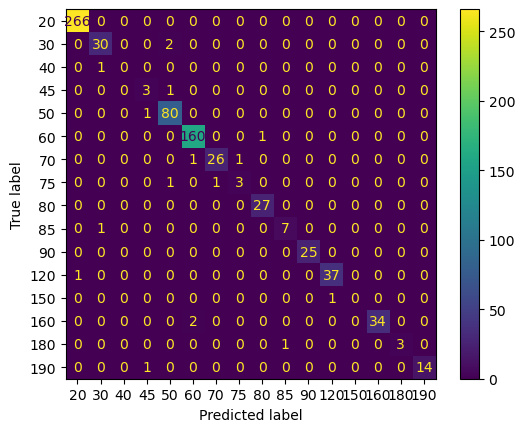

In [569]:
function_model_scaled(gradient_boosting_model_cv, 'gradient_boosting_model_cv')

In [524]:
gradient_boosting_model_cv.best_params_

{'n_estimators': 200, 'subsample': 0.6}

**ADA BOOST**

In [523]:
ada_model_cv = AdaBoostClassifier()

In [525]:
n_estimators = [100, 150, 200]
learning_rate = [0.001, 0.01, 0.1]

In [526]:
param_grid = {'n_estimators' : n_estimators, 'learning_rate' : learning_rate}

In [527]:
ada_boost_model_cv = GridSearchCV(estimator = ada_model_cv, param_grid = param_grid)

              precision    recall  f1-score   support

          20       0.78      1.00      0.87       266
          30       0.00      0.00      0.00        32
          40       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         4
          50       0.61      1.00      0.76        81
          60       0.78      0.98      0.87       161
          70       0.00      0.00      0.00        28
          75       0.00      0.00      0.00         5
          80       0.89      0.93      0.91        27
          85       0.78      0.88      0.82         8
          90       1.00      0.72      0.84        25
         120       0.00      0.00      0.00        38
         150       0.00      0.00      0.00         1
         160       0.00      0.00      0.00        36
         180       0.00      0.00      0.00         4
         190       1.00      0.07      0.12        15

    accuracy                           0.76       732
   macro avg       0.37   

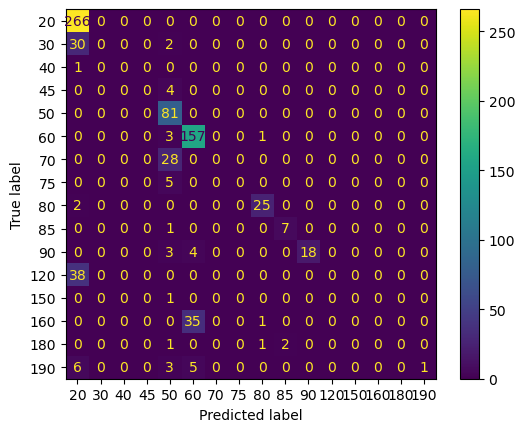

In [570]:
function_model_scaled(ada_boost_model_cv, 'ada_boost_model_cv')

In [529]:
ada_boost_model_cv.best_params_

{'learning_rate': 0.01, 'n_estimators': 150}

# Model overview

In this section, the selection of the optimal model takes place. I analyzed the results of all the models in the project and visually represented them using barplots.

In [571]:
accuracy_sorted = dict(sorted(accuracy_dict.items(), key = lambda item : item[1]))

In [572]:
accuracy_sorted_series = pd.Series(accuracy_sorted)

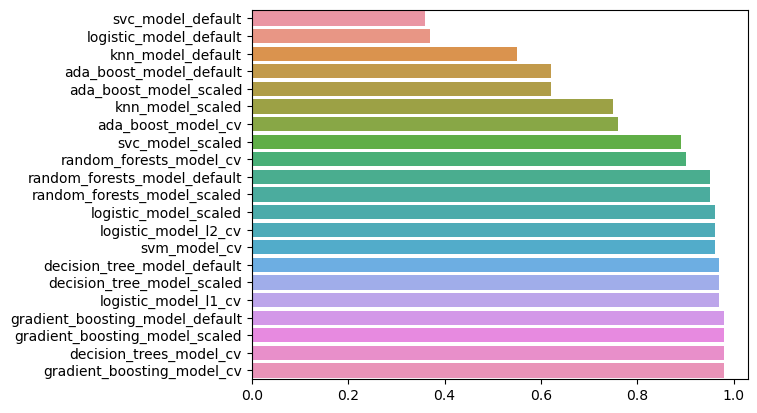

In [573]:
sns.barplot(x = accuracy_sorted_series, y = accuracy_sorted_series.index);

In [574]:
precision_sorted = dict(sorted(precision_dict.items(), key = lambda item : item[1]))

In [575]:
precision_sorted_series = pd.Series(precision_sorted)

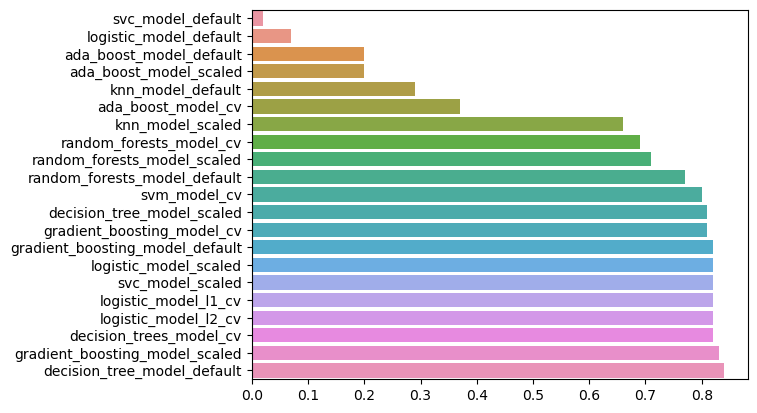

In [576]:
sns.barplot(x = precision_sorted_series, y = precision_sorted_series.index);

In [577]:
recall_sorted = dict(sorted(recall_dict.items(), key = lambda item : item[1]))

In [578]:
recall_sorted_series = pd.Series(recall_sorted)

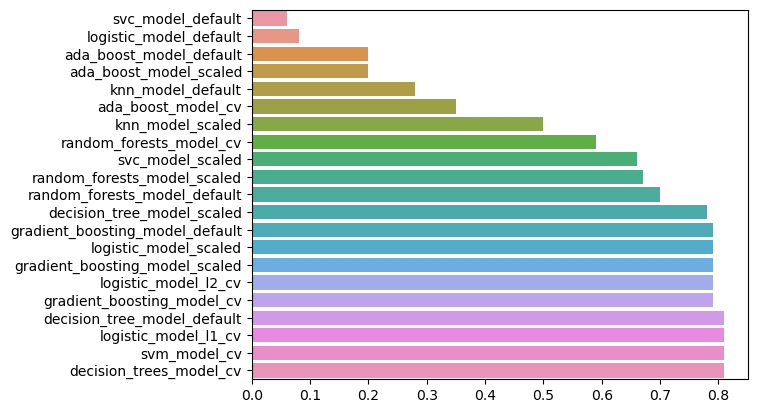

In [579]:
sns.barplot(x = recall_sorted_series, y = recall_sorted_series.index);

In [580]:
f1_score_sorted = dict(sorted(f1_score_dict.items(), key = lambda item : item[1]))

In [581]:
f1_score_series = pd.Series(f1_score_sorted)

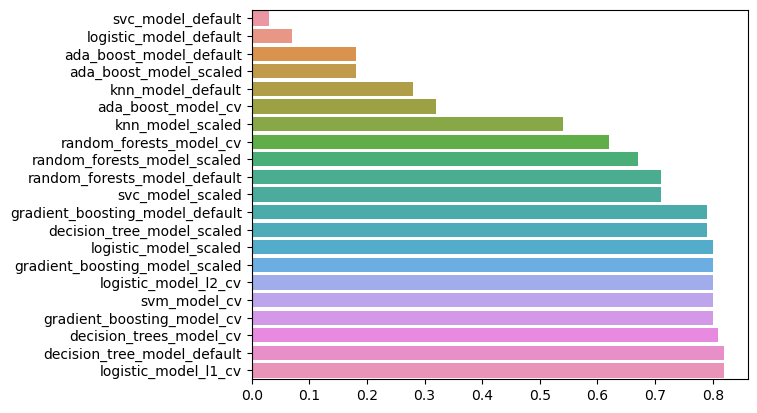

In [582]:
sns.barplot(x = f1_score_series, y = f1_score_series.index);

In [583]:
dff = pd.DataFrame(accuracy_sorted_series)

In [584]:
dff2 = pd.DataFrame(precision_sorted_series)

In [587]:
dff3 = pd.DataFrame(recall_sorted_series)

In [588]:
dff4 = pd.DataFrame(f1_score_series)

In [590]:
all_results = pd.concat([dff, dff2, dff3, dff4], ignore_index=True)

In [591]:
all_results

0
0   0.36
1   0.37
2   0.55
3   0.62
4   0.62
..   ...
79  0.80
80  0.80
81  0.81
82  0.82
83  0.82

[84 rows x 1 columns]